In [5]:
import pandas as pd
import numpy as np

# Load the training data (raw string with r prefix)
train = pd.read_csv(r'C:\Users\laksh\OneDrive\Desktop\Project Cleanup\Fraud Alert Threshold Optimization\Data\fraudTrain.csv', encoding='latin-1')

# Quick look at the data
print("Dataset shape:", train.shape)
print("\nFirst 5 rows:")
train.head()

Dataset shape: (1296675, 23)

First 5 rows:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
# Check column names and data types
print("Column names and types:")
print(train.dtypes)
print("\n" + "="*50)
print("\nNull values per column:")
print(train.isnull().sum())

Column names and types:
Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


Null values per column:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first          

In [7]:
# Check fraud distribution
print("Fraud distribution:")
print(train['is_fraud'].value_counts())
print("\nFraud percentage:")
print(train['is_fraud'].value_counts(normalize=True) * 100)

Fraud distribution:
is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Fraud percentage:
is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64


In [8]:
# Compare fraud vs legitimate transactions
print("Average transaction amount:")
print(train.groupby('is_fraud')['amt'].mean())

print("\n" + "="*50)
print("\nTop 5 categories for FRAUD transactions:")
print(train[train['is_fraud']==1]['category'].value_counts().head())

print("\n" + "="*50)
print("\nTop 5 categories for LEGITIMATE transactions:")
print(train[train['is_fraud']==0]['category'].value_counts().head())

Average transaction amount:
is_fraud
0     67.667110
1    531.320092
Name: amt, dtype: float64


Top 5 categories for FRAUD transactions:
category
grocery_pos      1743
shopping_net     1713
misc_net          915
shopping_pos      843
gas_transport     618
Name: count, dtype: int64


Top 5 categories for LEGITIMATE transactions:
category
gas_transport    131041
home             122917
grocery_pos      121895
shopping_pos     115829
kids_pets        112796
Name: count, dtype: int64


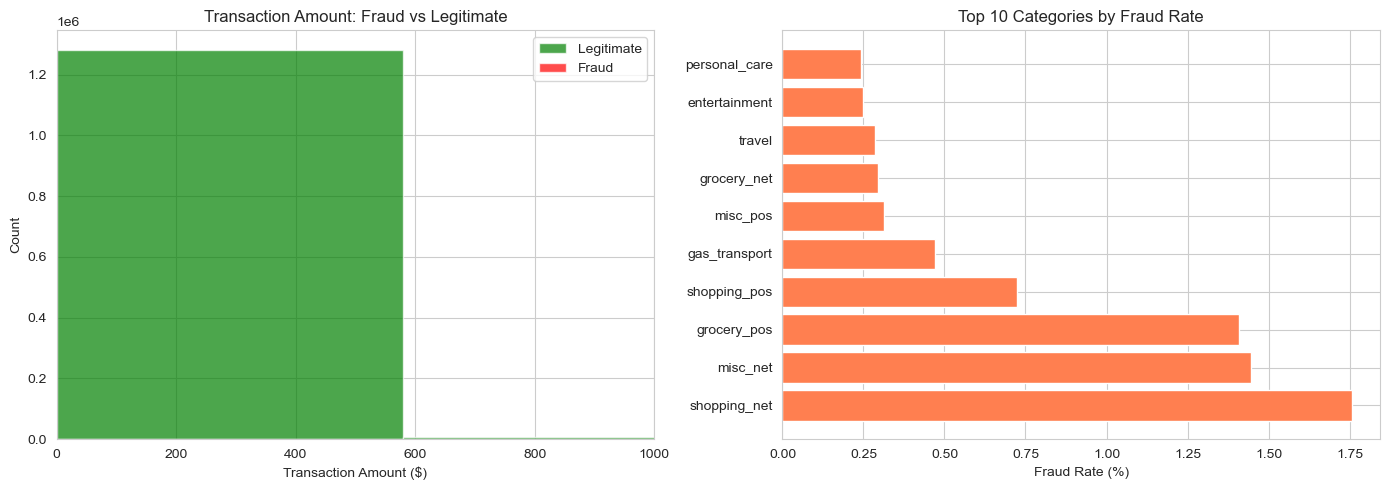

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create a simple comparison plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Transaction amount distribution
axes[0].hist(train[train['is_fraud']==0]['amt'], bins=50, alpha=0.7, label='Legitimate', color='green')
axes[0].hist(train[train['is_fraud']==1]['amt'], bins=50, alpha=0.7, label='Fraud', color='red')
axes[0].set_xlabel('Transaction Amount ($)')
axes[0].set_ylabel('Count')
axes[0].set_title('Transaction Amount: Fraud vs Legitimate')
axes[0].legend()
axes[0].set_xlim(0, 1000)  # Limit x-axis for better visibility

# Plot 2: Fraud rate by category (top 10)
fraud_by_cat = train.groupby('category')['is_fraud'].agg(['sum', 'count'])
fraud_by_cat['fraud_rate'] = (fraud_by_cat['sum'] / fraud_by_cat['count'] * 100)
top_fraud_cats = fraud_by_cat.nlargest(10, 'fraud_rate')

axes[1].barh(top_fraud_cats.index, top_fraud_cats['fraud_rate'], color='coral')
axes[1].set_xlabel('Fraud Rate (%)')
axes[1].set_title('Top 10 Categories by Fraud Rate')

plt.tight_layout()
plt.show()